<a href="https://colab.research.google.com/github/samyukthaananthan02/64060_sananth1/blob/main/AML_Assingnment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A case study using wine dataset for KNN algorithm

In [ ]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load wine dataset
wine = datasets.load_wine()
data, labels = wine.data, wine.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[2 0 1 1 0 0 1 0 0 2 1 0 1 2 1 2 1 1 0 0 2 0 1 1 1 2 2 0 2 1 2 1 1 0 2 1 0
 2 0 1 0 0 0 2 0 1 1 2 1 0 2 0 2 0 0 2 1 0 1 1 2 2 2 1 2 0 0 1 1 1 2 0 0 2
 2 0 1 0 1 1 2 1 1 0 1 0 1 1 0 1 1 0 0 1 1 2 1 0 0 1 0 1 1 0 0 1 0 1 0 0 2
 1 0 2 0 1 1 2 1 2 1 2 0 2 1 0 1 1 1 0 1 2 0 2 0 0 1 0 2 2 2 1]
Target values:
[1 0 1 1 0 0 1 0 0 2 1 0 1 2 1 2 2 2 0 0 2 0 1 1 1 1 0 0 0 1 2 1 1 2 2 1 1
 2 0 1 0 0 0 2 0 1 1 2 1 0 2 0 1 0 0 2 2 0 1 2 2 2 2 1 2 0 0 1 1 1 2 0 0 2
 2 2 1 0 1 1 2 1 2 0 1 0 0 2 0 1 1 0 0 1 1 1 1 0 2 2 1 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 1 2 2 1 1 1 0 1 1 0 1 1 1 1 1 2 2 2 0 0 1 0 2 2 2 1]
0.795774647887324


0.7222222222222222

Use this command to help with choice of paramters in the KNeighborsClassifier function.

In [ ]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Accuracy: 1.0


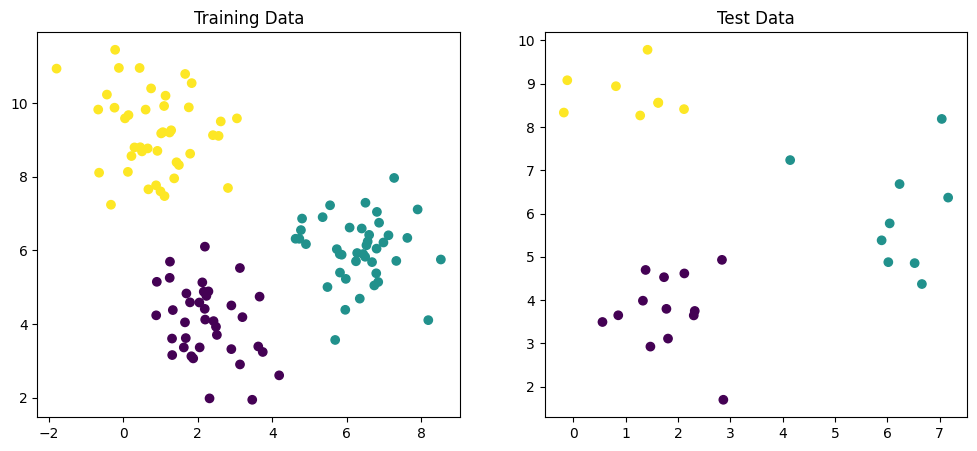

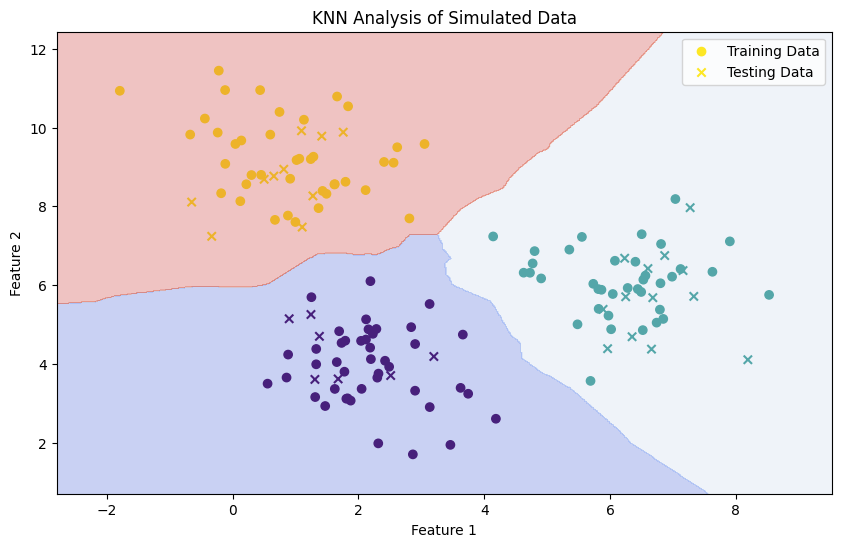

In [7]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generate the artificial dataset
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap='viridis')
plt.title('Training Data')

plt.subplot(1, 2, 2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='viridis')
plt.title('Test Data')

plt.show()

plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data')

# Plot testing data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Testing Data')

# Plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Analysis of Simulated Data')
plt.legend()
plt.show()
